# Loan Default Analysis and Prediction
This notebook explores factors associated with loan default and develops a predictive model using machine learning techniques. We perform data exploration, feature engineering, and model evaluation to identify important predictors of default risk.

## Table of Contents
1. [Introduction](#introduction)
2. [Data Loading and Initial Exploration](#data-loading)
3. [Data Cleaning and Preprocessing](#preprocessing)
4. [Exploratory Data Analysis](#eda)
5. [Feature Engineering](#feature-engineering)
6. [Model Training and Evaluation](#model-training)
7. [Model Performance Analysis](#performance)
8. [Conclusion and Future Work](#conclusion)


<a id="introduction"></a>
# Introduction to Dataset and Objectives
This notebook explores factors associated with loan default and develops a predictive model using machine learning techniques. We perform data exploration, feature engineering, and model evaluation to identify important predictors of default risk.

In [102]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

<a id="data-loading"></a>
## Loading and Exploring the Data
Here, we load the dataset and conduct an initial inspection of its structure and basic statistics.

In [2]:
df = pd.read_csv('Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [5]:
df.duplicated().sum()

0

<a id="eda"></a>
## Exploratory Data Analysis
We examine key variables and relationships in the data through visualizations. This helps in understanding the distribution of each feature and identifying any patterns related to loan default.

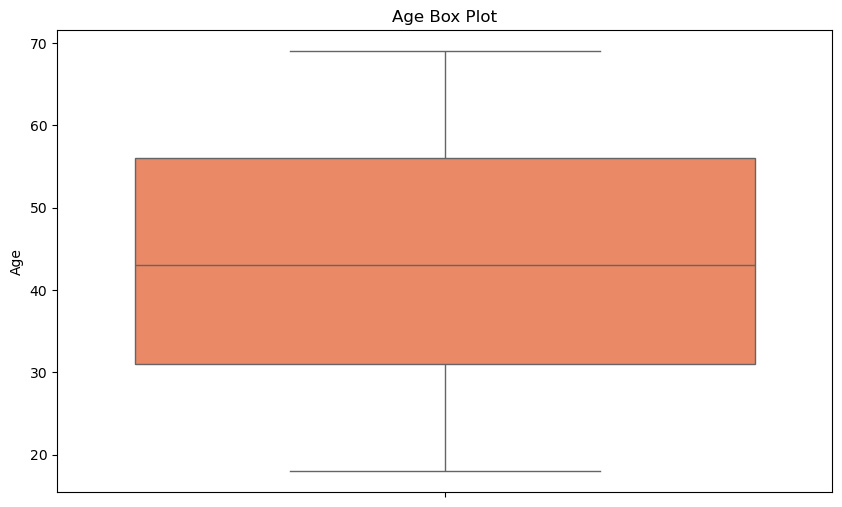

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Age'], color="coral")
plt.title('Age Box Plot');

In [8]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])

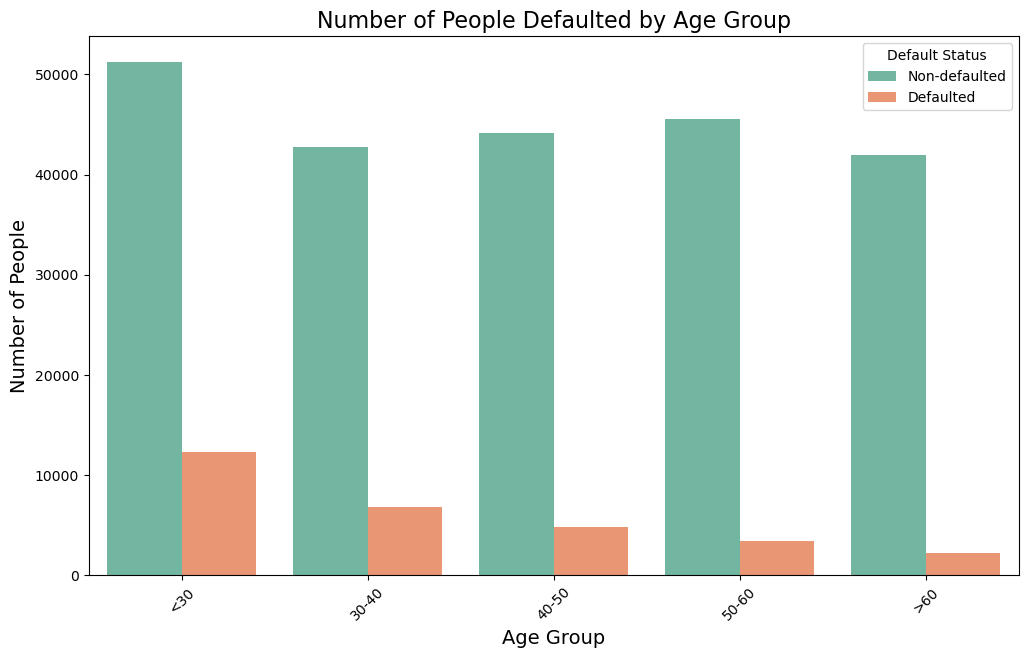

In [9]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='AgeGroup', hue='Default', palette="Set2")
plt.title('Number of People Defaulted by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Default Status', labels=['Non-defaulted', 'Defaulted'])
plt.show()

In [10]:
income_stats = df['Income'].describe()
income_stats

count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64

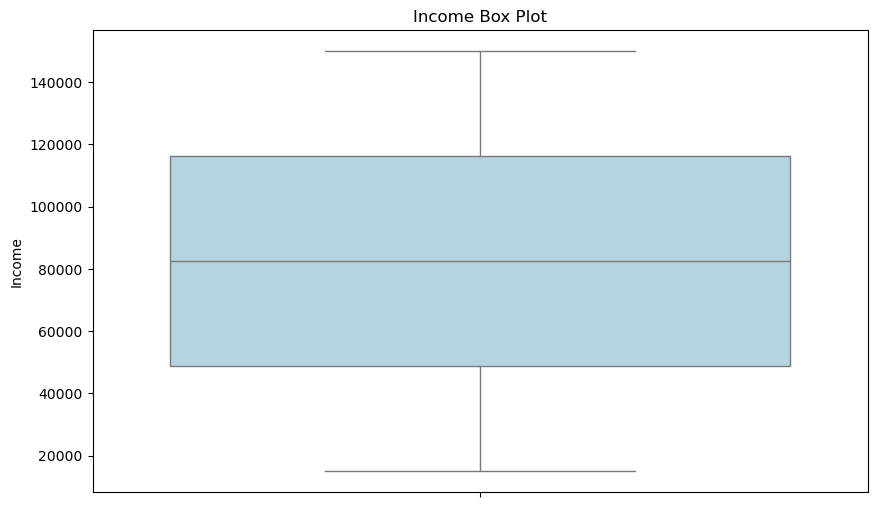

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Income'], color='lightblue')
plt.title('Income Box Plot');

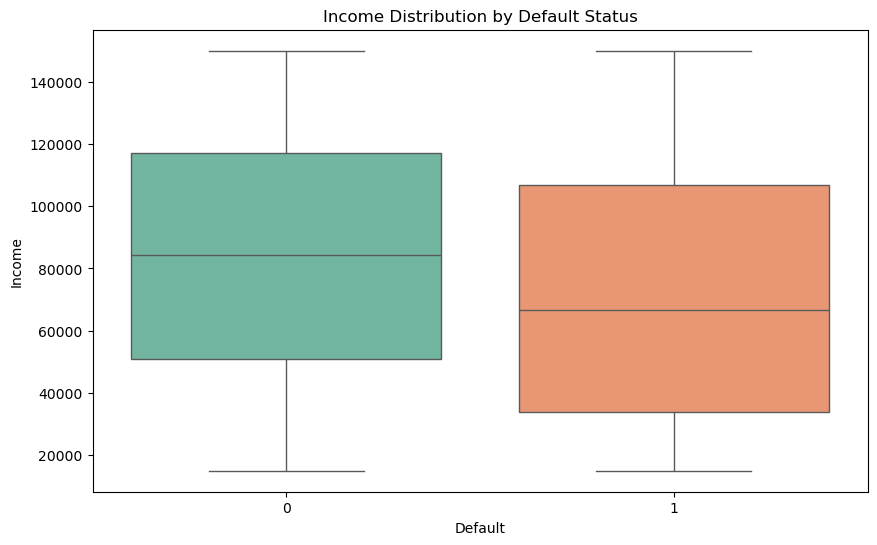

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='Income', data=df, palette="Set2")
plt.title('Income Distribution by Default Status');

In [14]:
df['IncomeGroup'] = pd.cut(df['Income'], bins=[0, 25000, 50000, 75000, 100000, 125000, 150000], labels=['<25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k'])

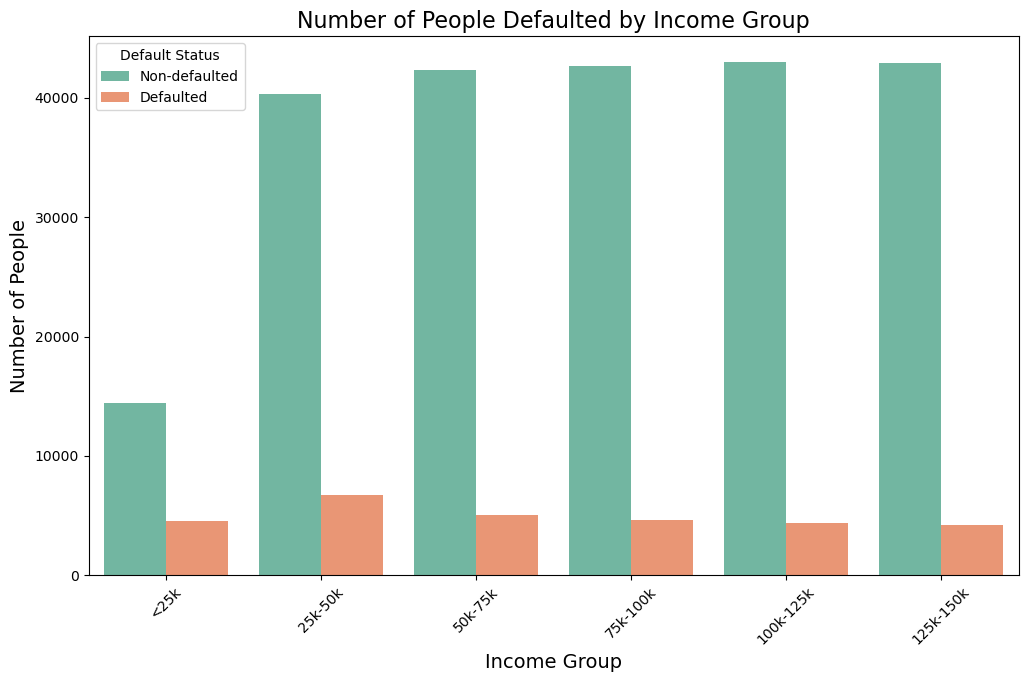

In [15]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='IncomeGroup', hue='Default', palette="Set2")
plt.title('Number of People Defaulted by Income Group', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Default Status', labels=['Non-defaulted', 'Defaulted'])
plt.show()

In [16]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeGroup
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,50-60,75k-100k
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,>60,50k-75k
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,40-50,75k-100k
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,30-40,25k-50k
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,50-60,<25k


In [17]:
loan_amount_stats = df['LoanAmount'].describe()
print("Loan Amount Statistics:")
print(loan_amount_stats)

Loan Amount Statistics:
count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64


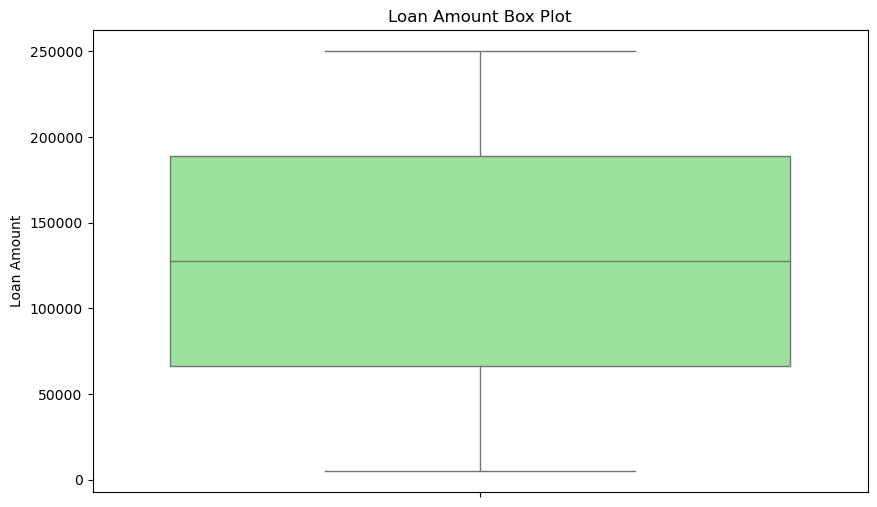

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['LoanAmount'], color="lightgreen")
plt.title('Loan Amount Box Plot')
plt.ylabel('Loan Amount')
plt.show()

In [20]:
df['LoanAmountGroup'] = pd.cut(df['LoanAmount'], bins=[0, 20000, 50000, 80000, 110000, 140000, 200000, 250000], labels=['<20k', '20-50k', '50-80k', '80-110k', '110-140k', '140k-200k', '200k-250k'])

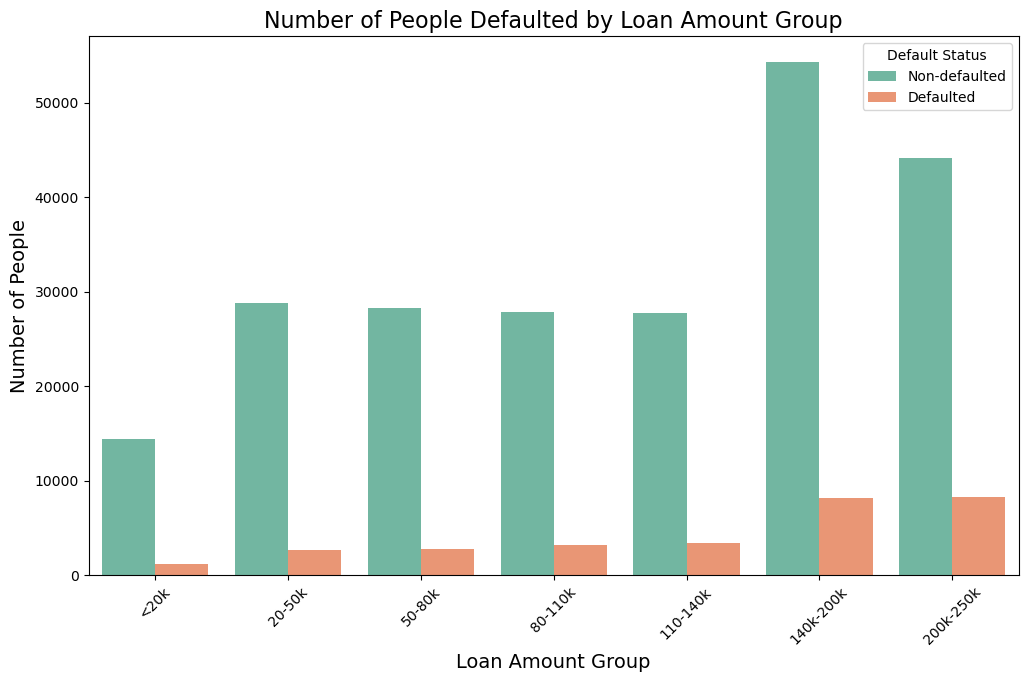

In [21]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='LoanAmountGroup', hue='Default', palette="Set2")
plt.title('Number of People Defaulted by Loan Amount Group', fontsize=16)
plt.xlabel('Loan Amount Group', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Default Status', labels=['Non-defaulted', 'Defaulted'])
plt.show()

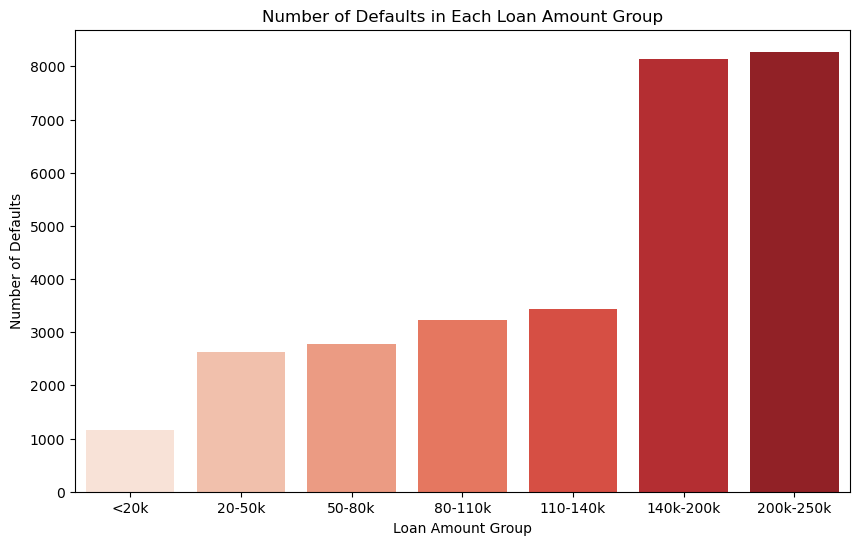

In [22]:
defaulted = df[df['Default'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(data=defaulted, x='LoanAmountGroup', palette="Reds")
plt.title('Number of Defaults in Each Loan Amount Group')
plt.xlabel('Loan Amount Group')
plt.ylabel('Number of Defaults')
plt.show()

<a id="feature-engineering"></a>
## Feature Engineering
New features are created to enhance the predictive power of the model, including transformations of existing columns and engineered ratios.

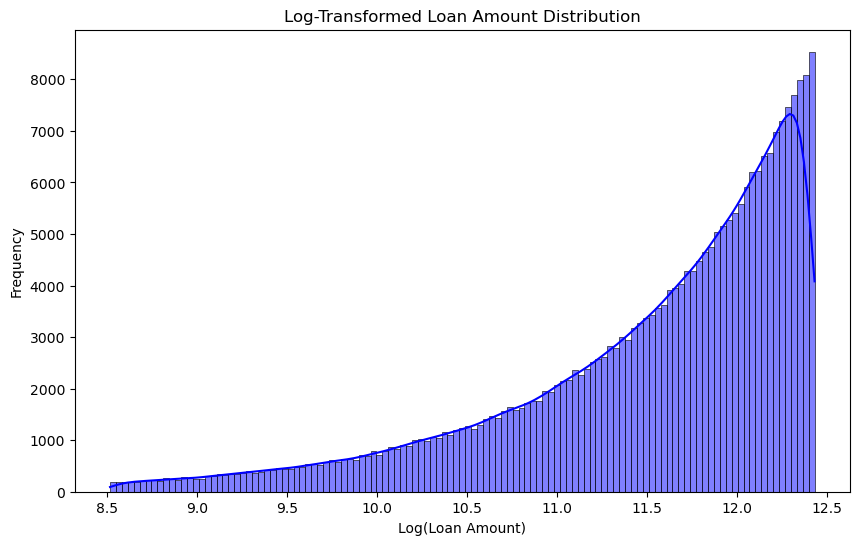

In [23]:
df['LogLoanAmount'] = np.log1p(df['LoanAmount'])

# Plot the transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['LogLoanAmount'], kde=True, color="blue")
plt.title('Log-Transformed Loan Amount Distribution')
plt.xlabel('Log(Loan Amount)')
plt.ylabel('Frequency')
plt.show()

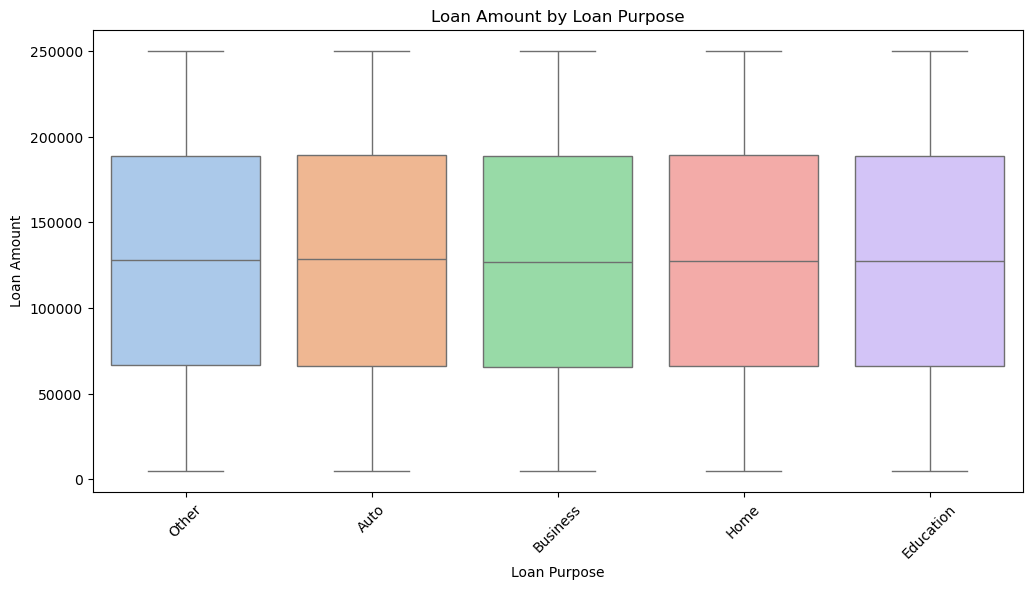

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LoanPurpose', y='LoanAmount', data=df, palette="pastel")
plt.title('Loan Amount by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()


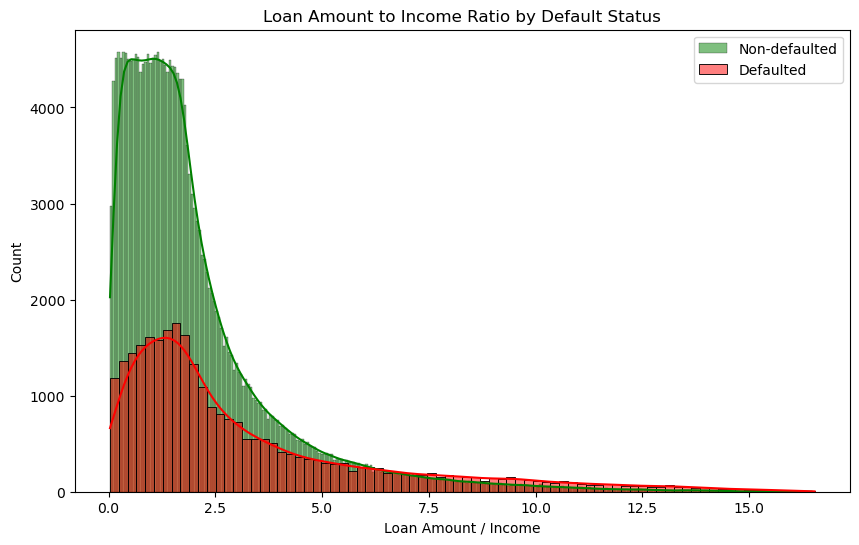

In [25]:
df['LoanAmount_Income'] = df['LoanAmount'] / df['Income']
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Default'] == 0]['LoanAmount_Income'], kde=True, color="green", label="Non-defaulted")
sns.histplot(df[df['Default'] == 1]['LoanAmount_Income'], kde=True, color="red", label="Defaulted")
plt.title('Loan Amount to Income Ratio by Default Status')
plt.xlabel('Loan Amount / Income')
plt.legend()
plt.show()


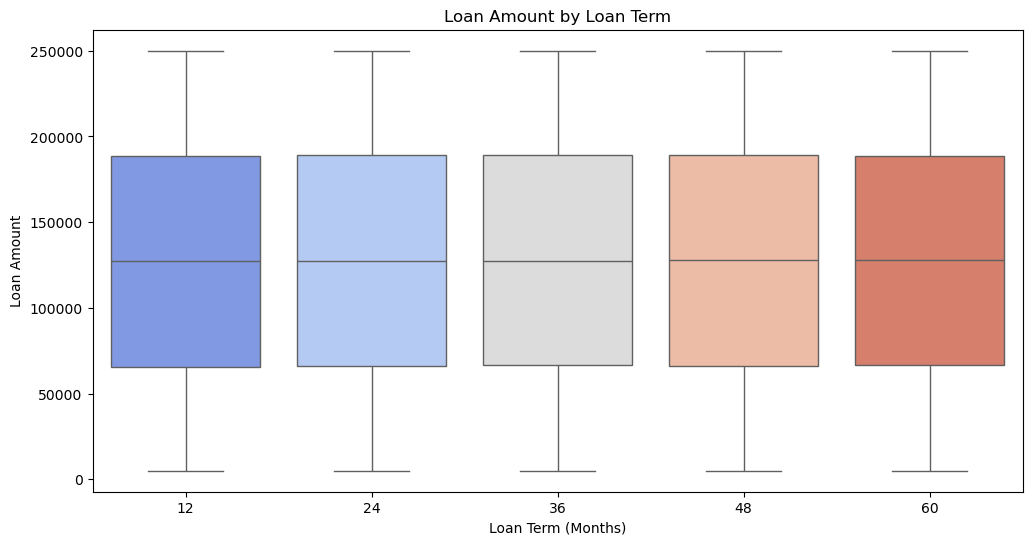

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LoanTerm', y='LoanAmount', data=df, palette="coolwarm")
plt.title('Loan Amount by Loan Term')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Amount')
plt.show()

In [27]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeGroup,LoanAmountGroup,LogLoanAmount,LoanAmount_Income
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Yes,Yes,Other,Yes,0,50-60,75k-100k,50-80k,10.831470,0.588262
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,No,No,Other,Yes,0,>60,50k-75k,110-140k,11.731587,2.467481
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Yes,Yes,Auto,No,1,40-50,75k-100k,110-140k,11.769032,1.534154
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,No,No,Business,No,0,30-40,25k-50k,20-50k,10.709963,1.412638
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,No,Yes,Auto,No,0,50-60,<25k,<20k,9.120416,0.447179


In [28]:
print(df['CreditScore'].describe())

count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64


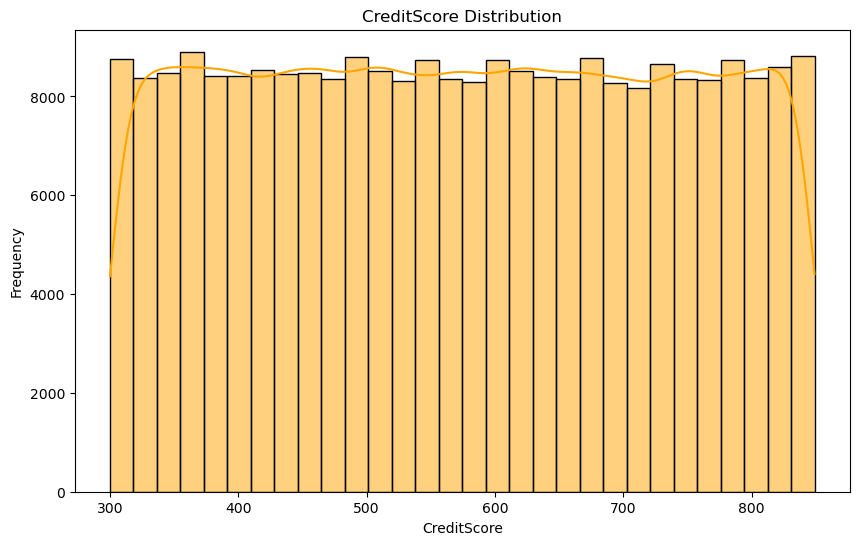

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', bins=30, kde=True, color="orange")
plt.title('CreditScore Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

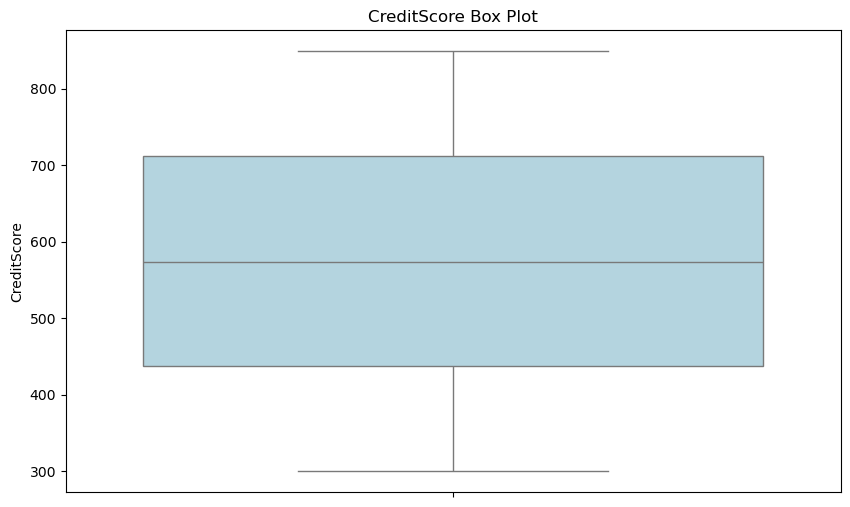

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['CreditScore'], color="lightblue")
plt.title('CreditScore Box Plot')
plt.ylabel('CreditScore')
plt.show()

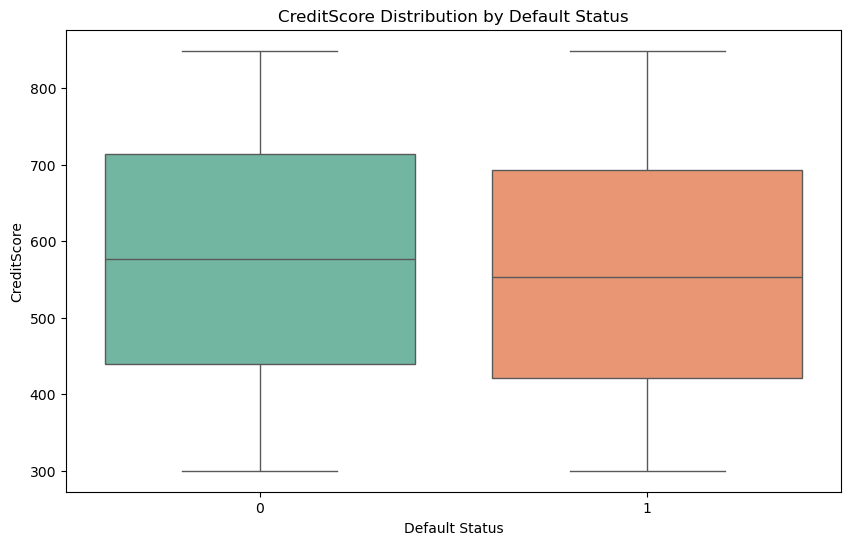

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='CreditScore', data=df, palette="Set2")
plt.title('CreditScore Distribution by Default Status')
plt.xlabel('Default Status')
plt.ylabel('CreditScore')
plt.show()

In [32]:
bins = [300, 500, 650, 800, 850]
labels = ['Poor', 'Fair', 'Good', 'Excellent']
df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=bins, labels=labels)

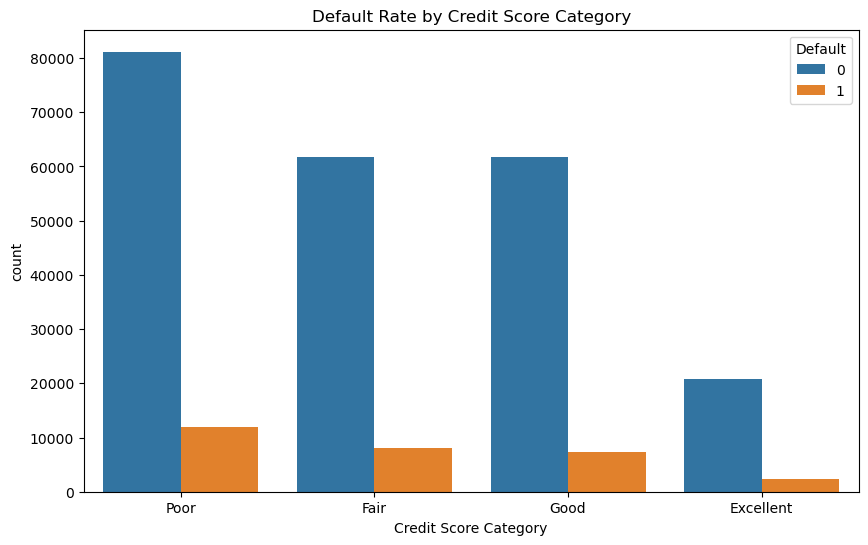

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CreditScoreCategory', hue='Default', data=df)
plt.title('Default Rate by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.show()


In [34]:
df['MonthsEmployed'].describe()

count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

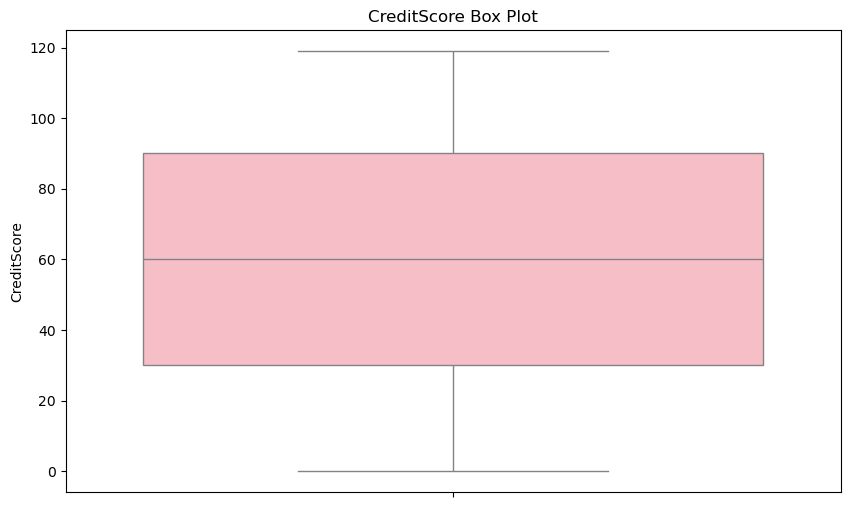

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['MonthsEmployed'], color="lightpink")
plt.title('CreditScore Box Plot')
plt.ylabel('CreditScore')
plt.show()

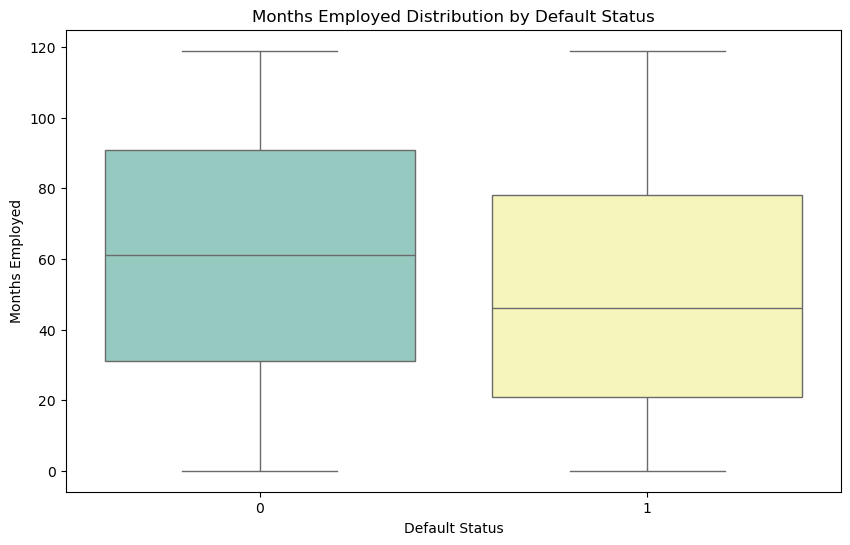

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='MonthsEmployed', data=df, palette="Set3")
plt.title('Months Employed Distribution by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Months Employed')
plt.show()

In [38]:
default_avg_employment = df.groupby('Default')['MonthsEmployed'].mean()
print("Average Months Employed by Default Status:\n", default_avg_employment)

Average Months Employed by Default Status:
 Default
0    60.764721
1    50.235457
Name: MonthsEmployed, dtype: float64


In [39]:
bins = [0, 12, 36, 60, 120]
labels = ['<1 year', '1-3 years', '3-5 years', '>5 years']
df['EmploymentDurationGroup'] = pd.cut(df['MonthsEmployed'], bins=bins, labels=labels)


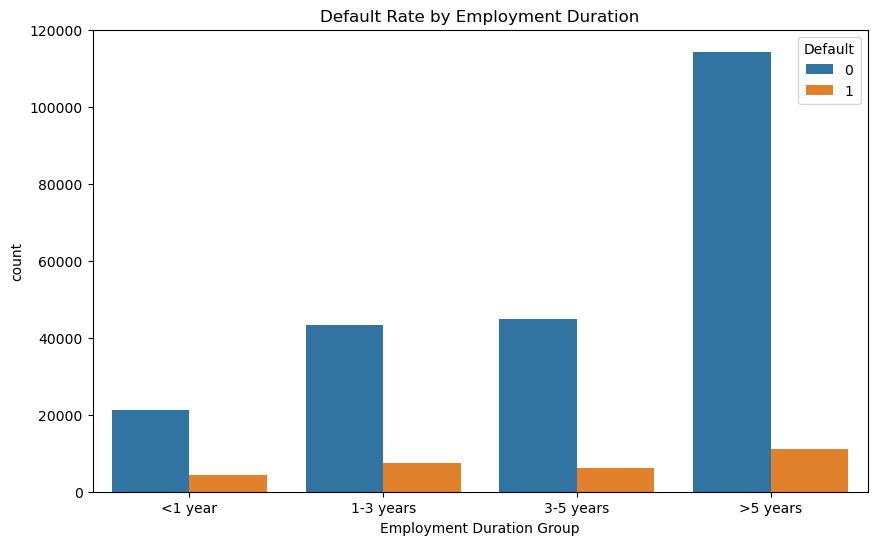

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EmploymentDurationGroup', hue='Default', data=df)
plt.title('Default Rate by Employment Duration')
plt.xlabel('Employment Duration Group')
plt.show()


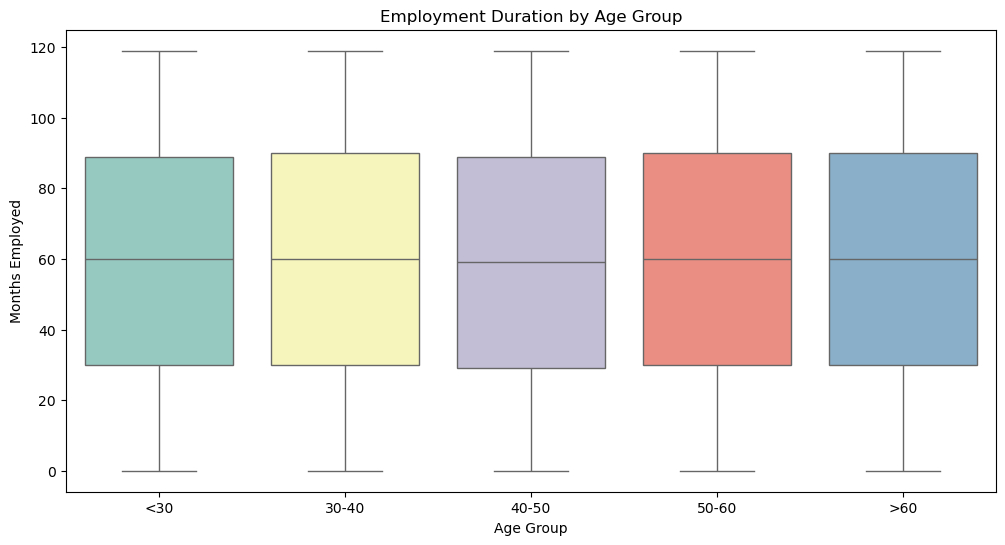

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroup', y='MonthsEmployed', data=df, palette="Set3")
plt.title('Employment Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Months Employed')
plt.show()

In [42]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeGroup,LoanAmountGroup,LogLoanAmount,LoanAmount_Income,CreditScoreCategory,EmploymentDurationGroup
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Other,Yes,0,50-60,75k-100k,50-80k,10.831470,0.588262,Fair,>5 years
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Other,Yes,0,>60,50k-75k,110-140k,11.731587,2.467481,Poor,1-3 years
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Auto,No,1,40-50,75k-100k,110-140k,11.769032,1.534154,Poor,1-3 years
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Business,No,0,30-40,25k-50k,20-50k,10.709963,1.412638,Good,NaN
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Auto,No,0,50-60,<25k,<20k,9.120416,0.447179,Fair,<1 year


In [43]:
df['NumCreditLines'].describe()

count    255347.000000
mean          2.501036
std           1.117018
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: NumCreditLines, dtype: float64

In [44]:
df['NumCreditLines'].value_counts()

NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64

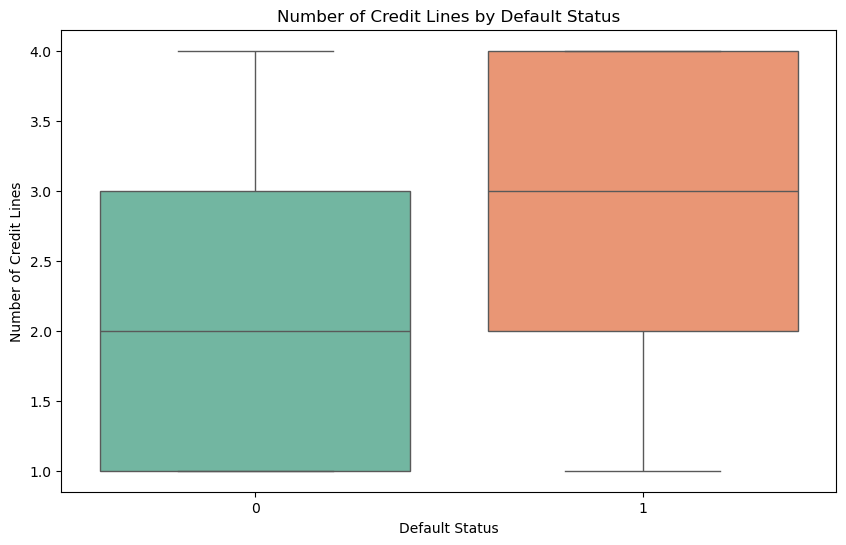

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='NumCreditLines', data=df, palette='Set2')
plt.title('Number of Credit Lines by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Number of Credit Lines')
plt.show()


In [46]:
default_avg_credit_lines = df.groupby('Default')['NumCreditLines'].mean()
print("Average Number of Credit Lines by Default Status:\n", default_avg_credit_lines)

Average Number of Credit Lines by Default Status:
 Default
0    2.489566
1    2.588338
Name: NumCreditLines, dtype: float64


In [47]:
bins = [0, 1, 2, 3, 4]
labels = [1, 2, 3, 4]
df['CreditLineCategory'] = pd.cut(df['NumCreditLines'], bins=bins, labels=labels)

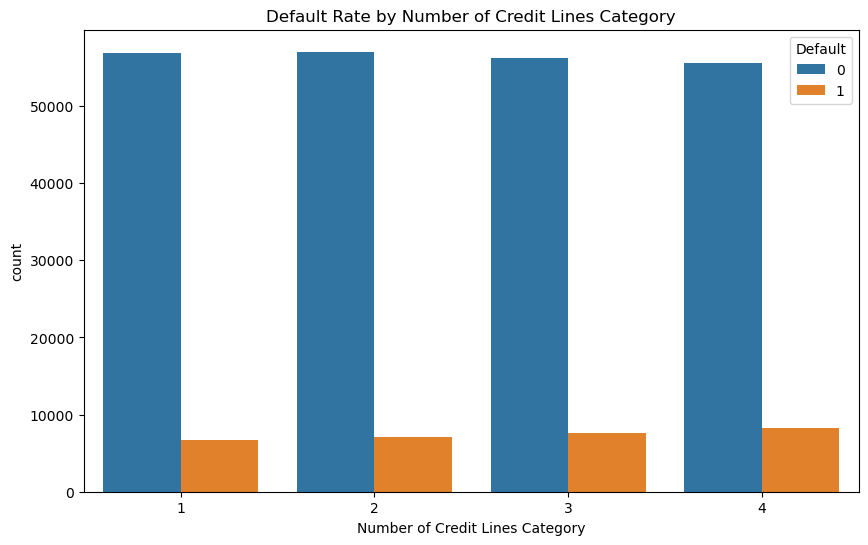

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CreditLineCategory', hue='Default', data=df)
plt.title('Default Rate by Number of Credit Lines Category')
plt.xlabel('Number of Credit Lines Category')
plt.show()

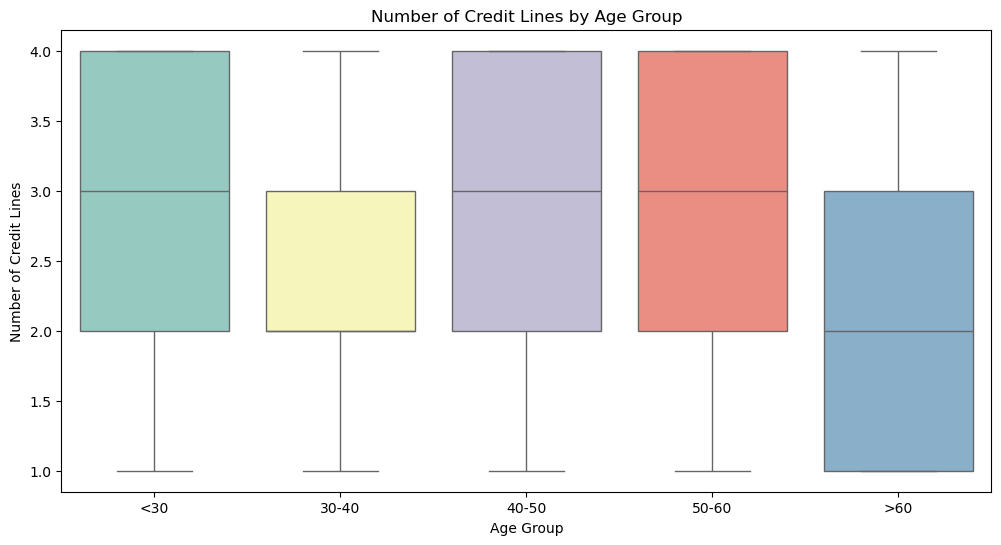

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroup', y='NumCreditLines', data=df, palette="Set3")
plt.title('Number of Credit Lines by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Credit Lines')
plt.show()

In [50]:
df['InterestRate'].describe()

count    255347.000000
mean         13.492773
std           6.636443
min           2.000000
25%           7.770000
50%          13.460000
75%          19.250000
max          25.000000
Name: InterestRate, dtype: float64

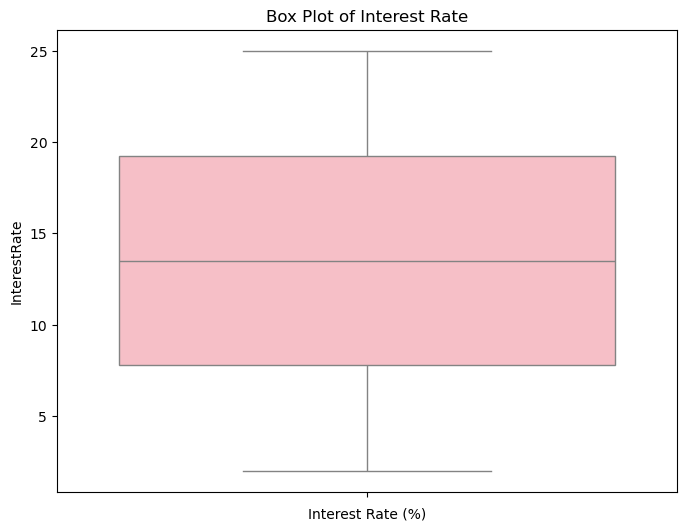

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['InterestRate'],color="lightpink")
plt.title('Box Plot of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.show()

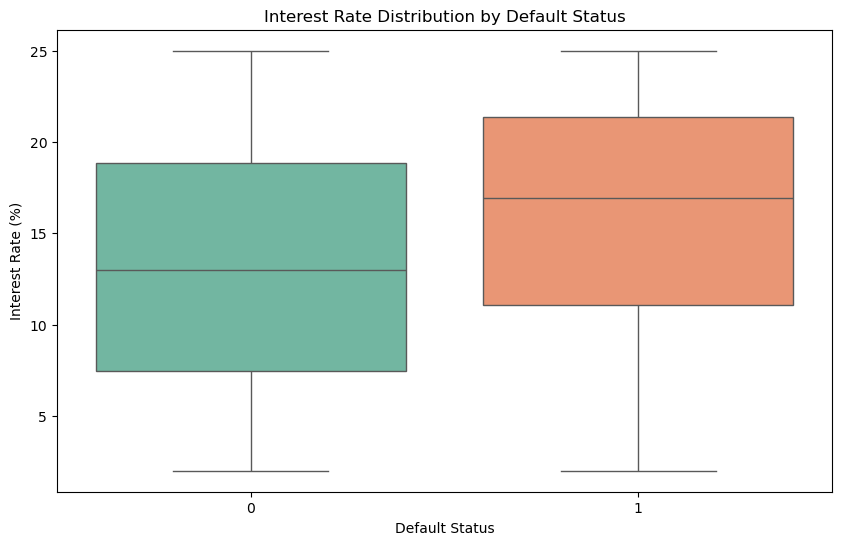

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Default', y='InterestRate', data=df, palette='Set2')
plt.title('Interest Rate Distribution by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Interest Rate (%)')
plt.show()

In [54]:
default_avg_interest = df.groupby('Default')['InterestRate'].mean()
print("Average Interest Rate by Default Status:\n", default_avg_interest)

Average Interest Rate by Default Status:
 Default
0    13.176994
1    15.896227
Name: InterestRate, dtype: float64


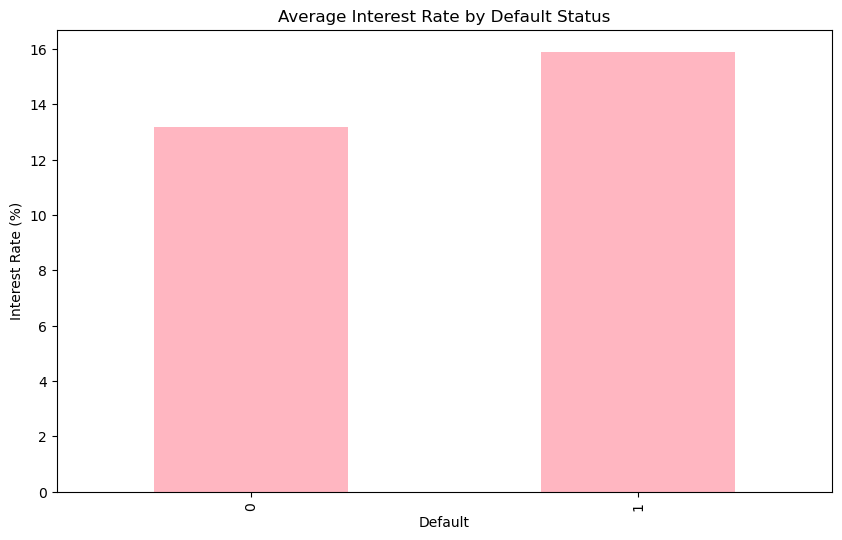

In [55]:
plt.figure(figsize=(10, 6))
default_avg_interest.plot(kind='bar', color='lightpink');
plt.title('Average Interest Rate by Default Status')
plt.xlabel('Default')
plt.ylabel('Interest Rate (%)');

In [56]:
bins = [0, 5, 10, 15, 20, 25]
labels = ['<5%', '5-10%', '10-15%', '15-20%', '>20%']
df['InterestRateGroup'] = pd.cut(df['InterestRate'], bins=bins, labels=labels)

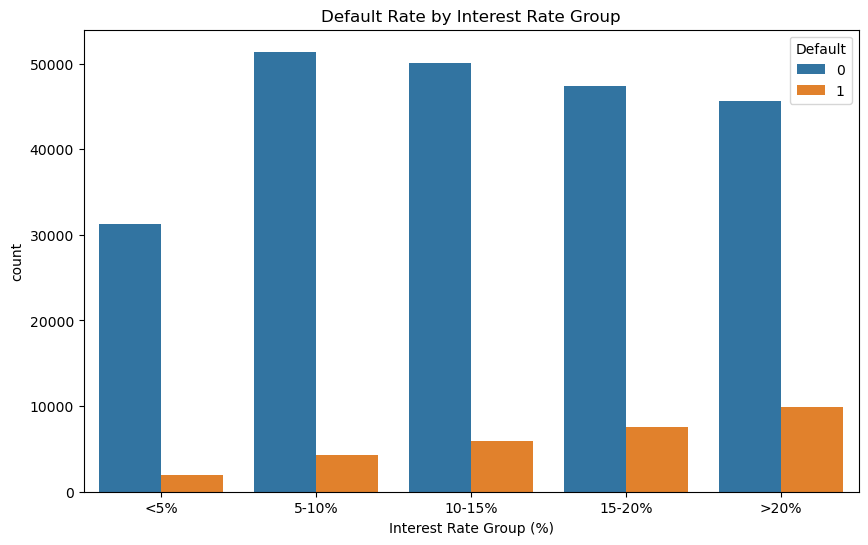

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InterestRateGroup', hue='Default', data=df)
plt.title('Default Rate by Interest Rate Group')
plt.xlabel('Interest Rate Group (%)')
plt.show()

In [58]:
df['LoanTerm'].describe()

count    255347.000000
mean         36.025894
std          16.969330
min          12.000000
25%          24.000000
50%          36.000000
75%          48.000000
max          60.000000
Name: LoanTerm, dtype: float64

In [59]:
df.LoanTerm.value_counts()

LoanTerm
48    51166
60    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64

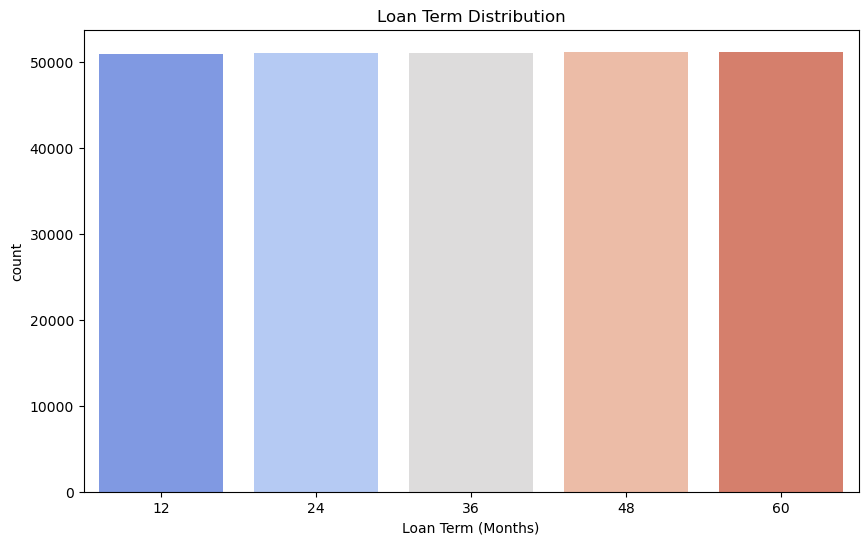

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="LoanTerm", palette ='coolwarm')
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (Months)')
plt.show()

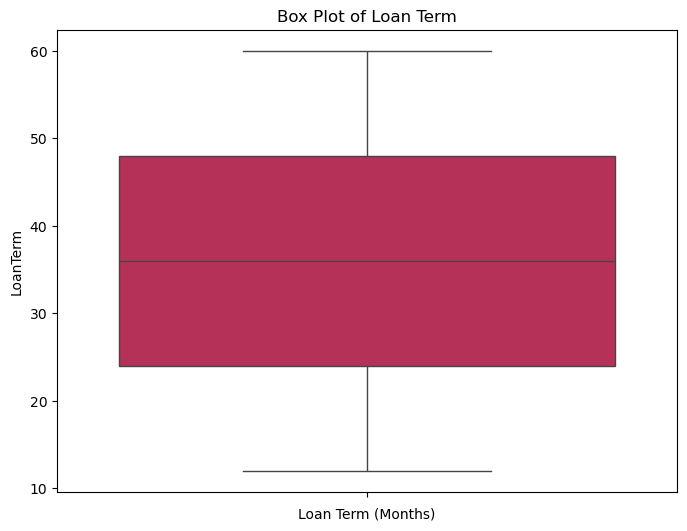

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['LoanTerm'], palette='rocket')
plt.title('Box Plot of Loan Term')
plt.xlabel('Loan Term (Months)')
plt.show()

In [62]:
bins = [0, 12, 36, 48, 60]
labels = ['<1 year', '1-3 years', '3-5 years', '>5 years']
df['LoanTermGroup'] = pd.cut(df['LoanTerm'], bins=bins, labels=labels)

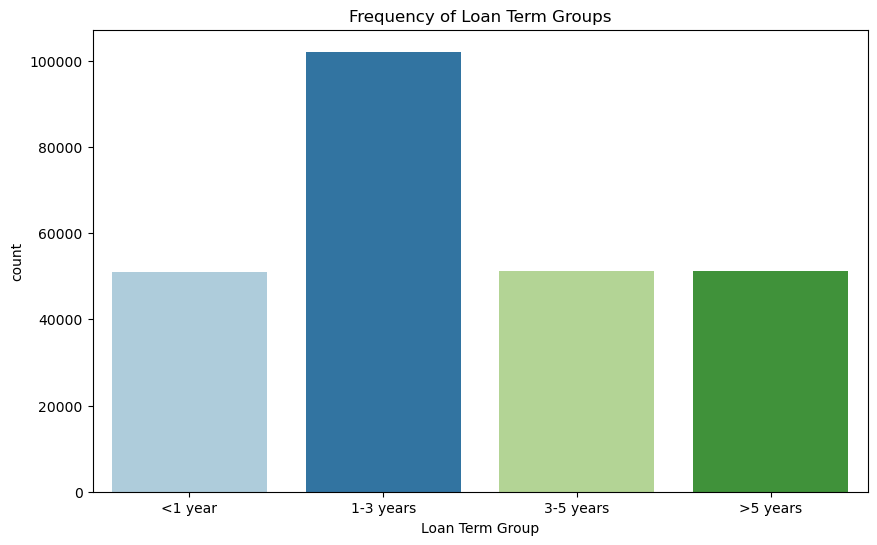

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanTermGroup', data=df, order=labels, palette="Paired")
plt.title('Frequency of Loan Term Groups')
plt.xlabel('Loan Term Group')
plt.show()

In [64]:
default_avg_loan_term = df.groupby('Default')['LoanTerm'].mean()
print("Average Loan Term by Default Status:\n", default_avg_loan_term)


Average Loan Term by Default Status:
 Default
0    36.022544
1    36.051394
Name: LoanTerm, dtype: float64


In [65]:
df['DTIRatio'].describe()

count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

In [66]:
bins = [0, 0.3, 0.6, 0.9]  # Example bins: Low, Moderate, High
labels = ['Low', 'Moderate', 'High']
df['DTIRatioGroup'] = pd.cut(df['DTIRatio'], bins=bins, labels=labels)


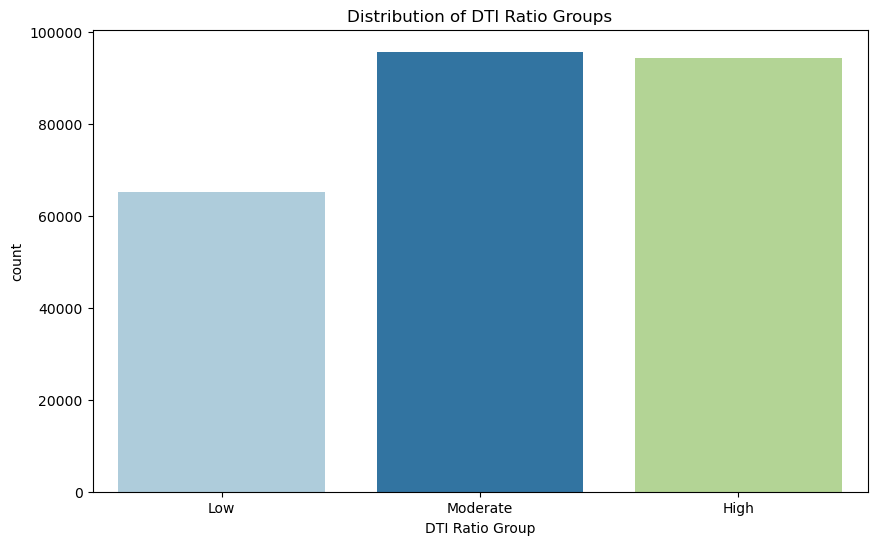

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DTIRatioGroup', data=df, order=labels, palette="Paired")
plt.title('Distribution of DTI Ratio Groups')
plt.xlabel('DTI Ratio Group')
plt.show()


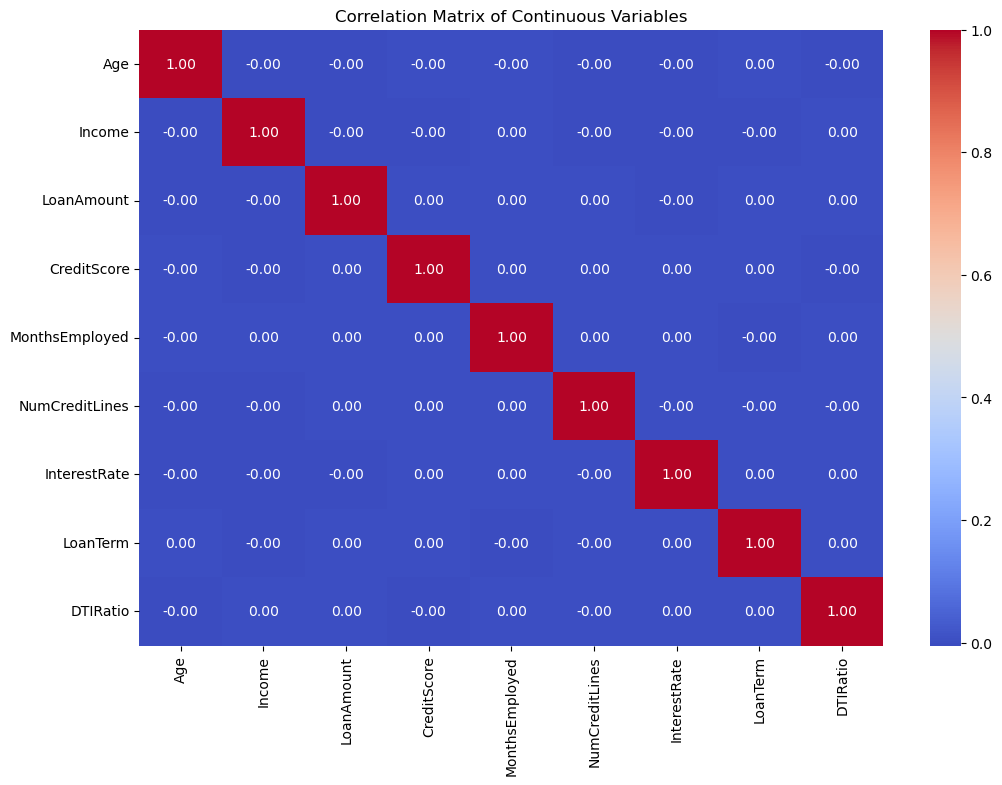

In [68]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

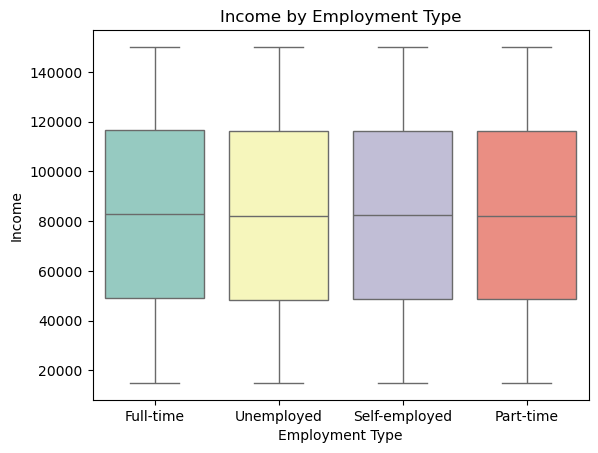

In [69]:
sns.boxplot(x='EmploymentType', y='Income', data=df, palette="Set3")
plt.title('Income by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Income')
plt.show()

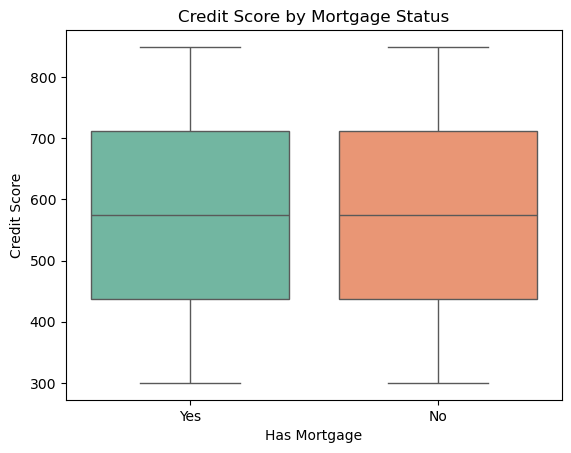

In [70]:
sns.boxplot(x='HasMortgage', y='CreditScore', data=df, palette="Set2")
plt.title('Credit Score by Mortgage Status')
plt.xlabel('Has Mortgage')
plt.ylabel('Credit Score')
plt.show()

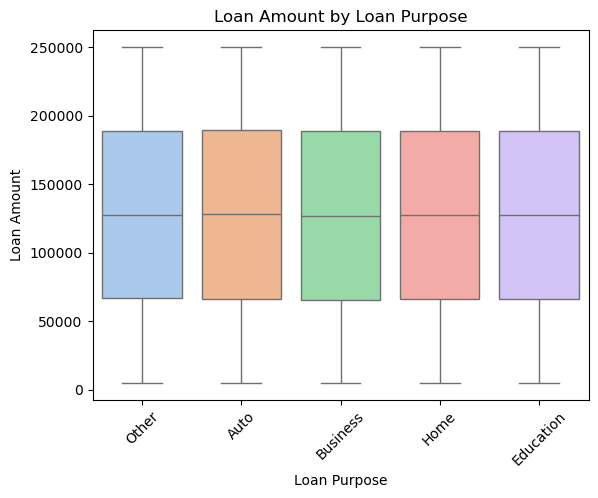

In [71]:
sns.boxplot(x='LoanPurpose', y='LoanAmount', data=df, palette="pastel")
plt.title('Loan Amount by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

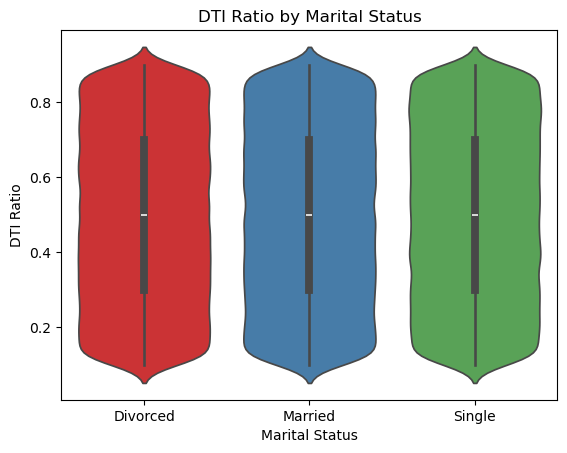

In [72]:
sns.violinplot(x='MaritalStatus', y='DTIRatio', data=df, palette='Set1')
plt.title('DTI Ratio by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('DTI Ratio')
plt.show()

In [73]:
crosstab_mortgage_default = pd.crosstab(df['HasMortgage'], df['Default'])
crosstab_mortgage_default

Default,0,1
HasMortgage,,
No,111909,15761
Yes,113785,13892


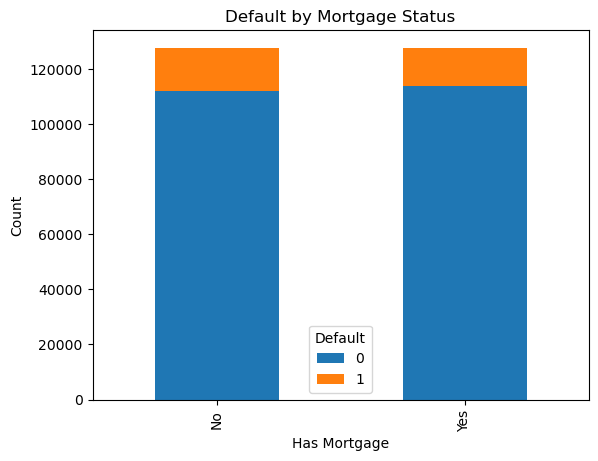

In [74]:
crosstab_mortgage_default.plot(kind='bar', stacked=True)
plt.title('Default by Mortgage Status')
plt.xlabel('Has Mortgage')
plt.ylabel('Count')
plt.legend(title='Default')
plt.show()

In [75]:
crosstab_employment_loanpurpose = pd.crosstab(df['EmploymentType'], df['LoanPurpose'])
crosstab_employment_loanpurpose

LoanPurpose,Auto,Business,Education,Home,Other
EmploymentType,,,,,
Full-time,12684,12751,12676,12776,12769
Part-time,12881,12819,12912,12819,12730
Self-employed,12714,12798,12691,12865,12638
Unemployed,12565,12930,12726,12826,12777


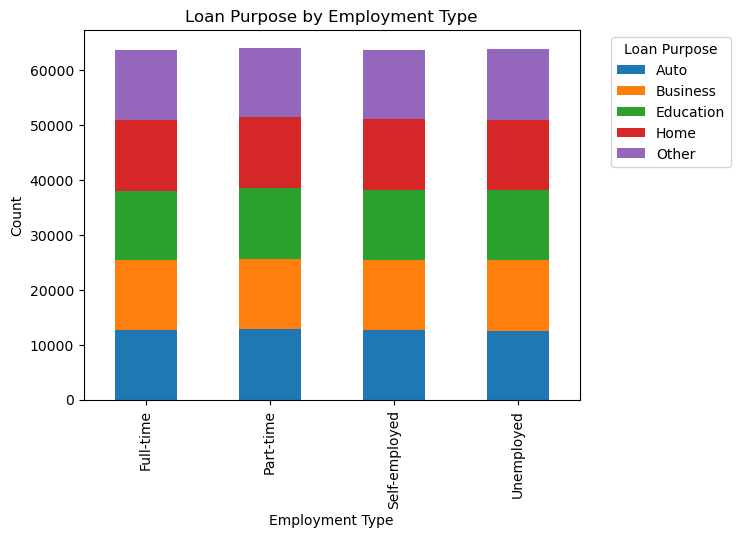

In [76]:
crosstab_employment_loanpurpose.plot(kind='bar', stacked=True)
plt.title('Loan Purpose by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Loan Purpose', bbox_to_anchor=(1.05, 1))
plt.show()

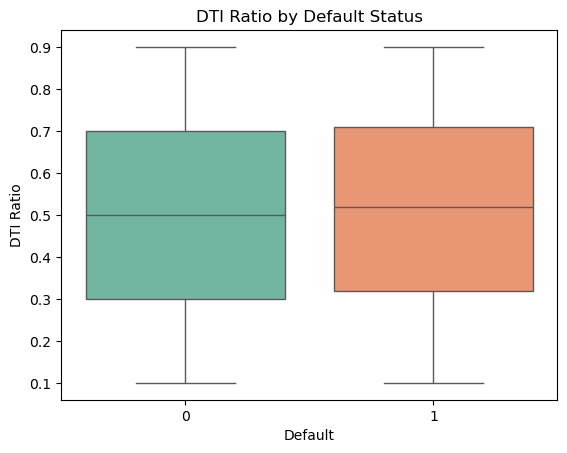

In [77]:
sns.boxplot(x='Default', y='DTIRatio', data=df, palette="Set2")
plt.title('DTI Ratio by Default Status')
plt.xlabel('Default')
plt.ylabel('DTI Ratio')
plt.show()

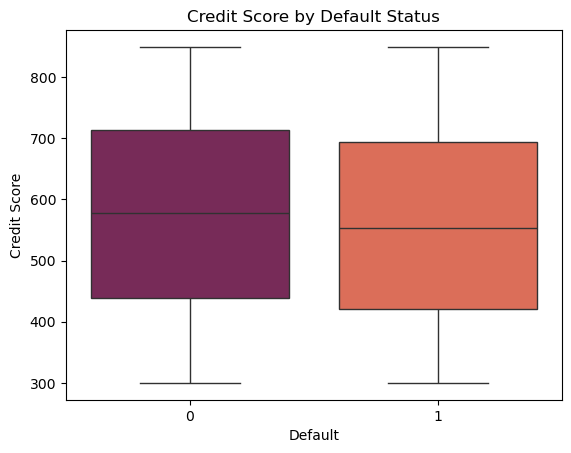

In [78]:
sns.boxplot(x='Default', y='CreditScore', data=df, palette='rocket')
plt.title('Credit Score by Default Status')
plt.xlabel('Default')
plt.ylabel('Credit Score')
plt.show()

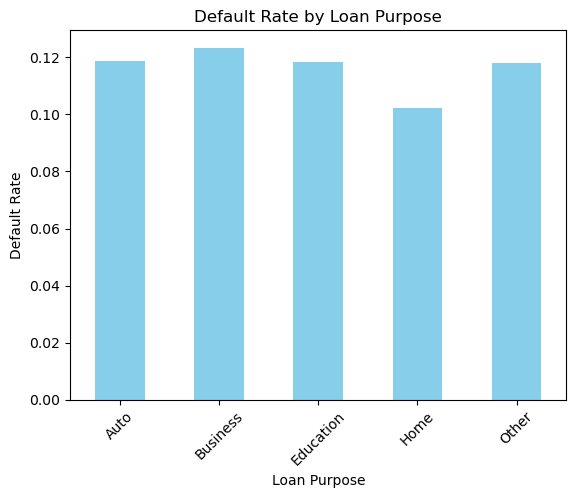

In [79]:
default_rate_purpose = df.groupby('LoanPurpose')['Default'].mean()
default_rate_purpose.plot(kind='bar', color='skyblue')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   LoanID                   255347 non-null  object  
 1   Age                      255347 non-null  int64   
 2   Income                   255347 non-null  int64   
 3   LoanAmount               255347 non-null  int64   
 4   CreditScore              255347 non-null  int64   
 5   MonthsEmployed           255347 non-null  int64   
 6   NumCreditLines           255347 non-null  int64   
 7   InterestRate             255347 non-null  float64 
 8   LoanTerm                 255347 non-null  int64   
 9   DTIRatio                 255347 non-null  float64 
 10  Education                255347 non-null  object  
 11  EmploymentType           255347 non-null  object  
 12  MaritalStatus            255347 non-null  object  
 13  HasMortgage              255347 non-null  ob

In [81]:
df.set_index('LoanID', inplace=True)

In [82]:
df.select_dtypes(include=['category']).columns

Index(['AgeGroup', 'IncomeGroup', 'LoanAmountGroup', 'CreditScoreCategory',
       'EmploymentDurationGroup', 'CreditLineCategory', 'InterestRateGroup',
       'LoanTermGroup', 'DTIRatioGroup'],
      dtype='object')

In [83]:
df.drop(columns=df.select_dtypes(include=['category']).columns, inplace=True)

In [84]:
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("-" * 40)

Column: Education
Unique Values: ["Bachelor's" "Master's" 'High School' 'PhD']
----------------------------------------
Column: EmploymentType
Unique Values: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
----------------------------------------
Column: MaritalStatus
Unique Values: ['Divorced' 'Married' 'Single']
----------------------------------------
Column: HasMortgage
Unique Values: ['Yes' 'No']
----------------------------------------
Column: HasDependents
Unique Values: ['Yes' 'No']
----------------------------------------
Column: LoanPurpose
Unique Values: ['Other' 'Auto' 'Business' 'Home' 'Education']
----------------------------------------
Column: HasCoSigner
Unique Values: ['Yes' 'No']
----------------------------------------


In [85]:
df.Default.value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

<a id="preprocessing"></a>
## Data Cleaning and Preprocessing
This section includes steps for cleaning the data, handling missing values, encoding categorical variables, and scaling features to prepare them for model training.

In [86]:
label_encoder = LabelEncoder()
for col in ['MaritalStatus', 'HasCoSigner', 'HasDependents', 'HasMortgage']:
    df[col] = label_encoder.fit_transform(df[col])

In [87]:
encoder = OneHotEncoder(cols=['Education', 'EmploymentType', 'LoanPurpose'], use_cat_names=True)
df = encoder.fit_transform(df)

In [88]:
X = df.drop('Default', axis=1)
y = df['Default']

In [89]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [90]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.05, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [91]:
y_test_series = pd.Series(y_test)
base_line = y_test_series.value_counts(normalize=True).max()
base_line

0.8892543859649122

In [92]:
over_sampler = RandomOverSampler()
under_sampler = RandomUnderSampler()
smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

In [93]:
y_train.shape, X_train.shape

((428736,), (428736, 28))

In [94]:
eval_set = [(X_val, y_val)]

<a id="model-training"></a>
## Model Training and Evaluation
We train a machine learning model on the processed dataset to predict loan default risk. The model is evaluated using metrics such as accuracy and F1-score to assess its performance.

In [95]:
model = xgb.XGBClassifier(n_estimators=100, eval_metric="logloss", alpha=0.01)

In [96]:
model.fit(X_train, y_train, eval_set=eval_set);

[0]	validation_0-logloss:0.63698
[1]	validation_0-logloss:0.60094
[2]	validation_0-logloss:0.57537
[3]	validation_0-logloss:0.53800
[4]	validation_0-logloss:0.49824
[5]	validation_0-logloss:0.46278
[6]	validation_0-logloss:0.45159
[7]	validation_0-logloss:0.43247
[8]	validation_0-logloss:0.41579
[9]	validation_0-logloss:0.40083
[10]	validation_0-logloss:0.39695
[11]	validation_0-logloss:0.39558
[12]	validation_0-logloss:0.38682
[13]	validation_0-logloss:0.37832
[14]	validation_0-logloss:0.37133
[15]	validation_0-logloss:0.36897
[16]	validation_0-logloss:0.36750
[17]	validation_0-logloss:0.36323
[18]	validation_0-logloss:0.35822
[19]	validation_0-logloss:0.35398
[20]	validation_0-logloss:0.35205
[21]	validation_0-logloss:0.34939
[22]	validation_0-logloss:0.34858
[23]	validation_0-logloss:0.34551
[24]	validation_0-logloss:0.34496
[25]	validation_0-logloss:0.34343
[26]	validation_0-logloss:0.34335
[27]	validation_0-logloss:0.34077
[28]	validation_0-logloss:0.34009
[29]	validation_0-loglos

In [97]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

<a id="performance"></a>
## Model Performance Analysis
This section provides an in-depth analysis of the model's performance, including a confusion matrix and classification report to evaluate the prediction accuracy and handling of false positives/negatives.

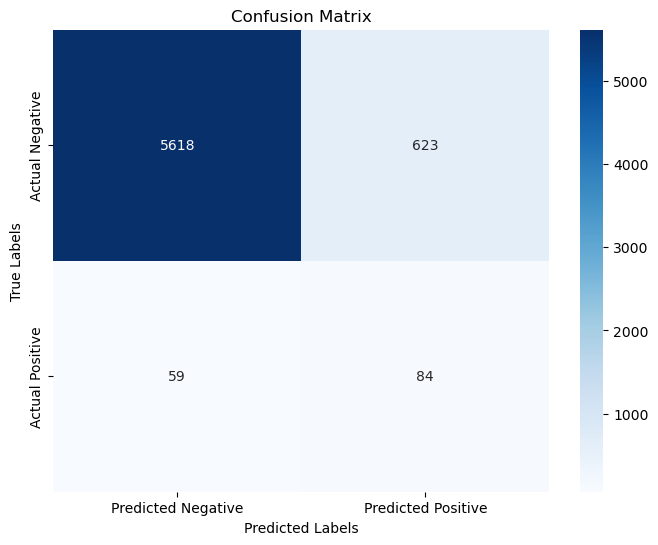

In [98]:
conf_matrix = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [99]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 89.32%


In [100]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5677
           1       0.59      0.12      0.20       707

    accuracy                           0.89      6384
   macro avg       0.74      0.55      0.57      6384
weighted avg       0.87      0.89      0.86      6384



In [103]:
with open ('model.pkl', 'wb') as f:
    pickle.dump(model, f)

<a id="conclusion"></a>
## Conclusion and Future Work
In this notebook, we analyzed the key drivers of loan default and developed a predictive model. Future work could explore:
- Alternative machine learning algorithms
- Advanced feature selection techniques
- Hyperparameter optimization
- Handling class imbalance
- Incorporating additional external data sources